In [530]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import seaborn as sns
import numpy as np
from datetime import datetime

In [531]:
# Read the CSV file into a DataFrame
df_Milk = pd.read_csv('Milk.csv')
df_Onion = pd.read_csv('Onion.csv')
df_Salt = pd.read_csv('Salt.csv')
df_Sugar = pd.read_csv('Sugar.csv')
df_Sunflower_oil = pd.read_csv('Sunflower_oil.csv')
df_tea = pd.read_csv('Tea.csv')
# df_Milk.head()
# df_Onion.head()
# df_Salt.head()
# df_Sugar.head()
# df_Sunflower_oil.head()


/var/folders/jr/wm6nfdts68g443wnl4pn04kr0000gn/T/ipykernel_27546/99923187.py:2: DtypeWarning: Columns (0,1,2,4,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Milk = pd.read_csv('Milk.csv')
/var/folders/jr/wm6nfdts68g443wnl4pn04kr0000gn/T/ipykernel_27546/99923187.py:3: DtypeWarning: Columns (0,1,2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Onion = pd.read_csv('Onion.csv')
/var/folders/jr/wm6nfdts68g443wnl4pn04kr0000gn/T/ipykernel_27546/99923187.py:4: DtypeWarning: Columns (0,1,2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Salt = pd.read_csv('Salt.csv')
/var/folders/jr/wm6nfdts68g443wnl4pn04kr0000gn/T/ipykernel_27546/99923187.py:5: DtypeWarning: Columns (0,1,2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Sugar = pd.read_csv('Sugar.csv')
/var/folders/jr/wm6nfdts68g443wnl4pn04kr0000gn/T/ipykernel_27546/99923187.py:6: DtypeWarning: Columns (0

In [532]:
dataOfCommodety = df_Salt
dataOfCommodety.tail(10)

,Date,Centre,Commodity,Price per Kg,Region
846662,NaN,NaN,NaN,NaN,NaN
846663,NaN,NaN,NaN,NaN,NaN
846664,NaN,NaN,NaN,NaN,NaN
846665,NaN,NaN,NaN,NaN,NaN
846666,NaN,NaN,NaN,NaN,NaN
846667,NaN,NaN,NaN,NaN,NaN
846668,NaN,NaN,NaN,NaN,NaN
846669,NaN,NaN,NaN,NaN,NaN
846670,NaN,NaN,NaN,NaN,NaN
846671,NaN,NaN,NaN,NaN,NaN


In [533]:
# print(dataOfCommodety.describe())

In [534]:
# Find the number of missing values in each column
missing_values = dataOfCommodety.isnull().sum()

print(missing_values)

Date            753221
Centre          753221
Commodity       753221
Price per Kg    753221
Region          753221
dtype: int64


In [535]:
[features for features in df_tea.columns if df_tea[features].isnull().sum()>0]

['Date', 'Centre', 'Commodity', 'Price per Kg', 'Region']

In [536]:
dataOfCommodety.dropna(how='any', inplace=True)
dataOfCommodety.tail(10)
missing_values = dataOfCommodety.isnull().sum()
print(missing_values)
data_frame = dataOfCommodety
data_frame['Date'] = pd.to_datetime(data_frame['Date'])

# dataframe.head()

Date            0
Centre          0
Commodity       0
Price per Kg    0
Region          0
dtype: int64


There are several Regions in the retail data, we will start from time series analysis and forcasting foe the 'NORTH'

In [537]:
data_frame['Region'].value_counts()

NORTH         27075
SOUTH         19816
WEST          19702
EAST          14855
NORTH EAST    12003
Name: Region, dtype: int64

In [538]:
# NORTH Region
Region= data_frame.loc[data_frame['Region']=='NORTH EAST']
Region.head(5)

,Date,Centre,Commodity,Price per Kg,Region
10,2003-01-01,SHILLONG,Salt Pack (Iodised),7.0,NORTH EAST
11,2003-01-01,AIZWAL,Salt Pack (Iodised),8.0,NORTH EAST
12,2003-01-01,AGARTALA,Salt Pack (Iodised),7.0,NORTH EAST
27,2003-01-02,SHILLONG,Salt Pack (Iodised),7.0,NORTH EAST
28,2003-01-02,AIZWAL,Salt Pack (Iodised),8.0,NORTH EAST


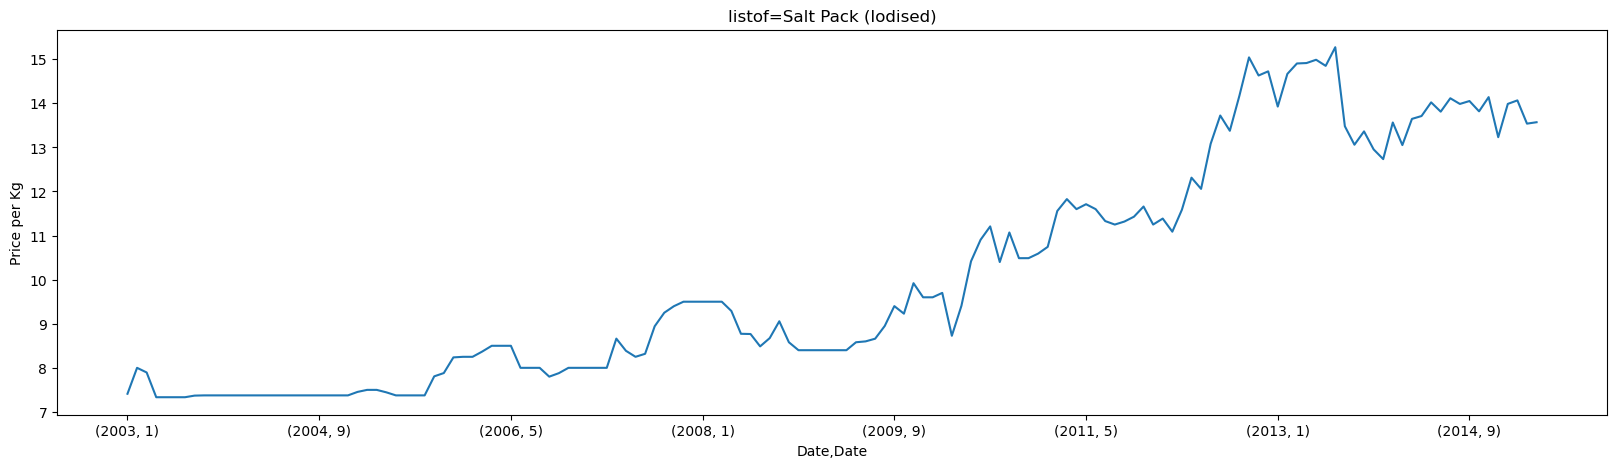

In [539]:
list=Region["Commodity"].unique()
for i in list:
    listof = Region.loc[Region["Commodity"]==i]
    listof['Date'] = pd.to_datetime(listof['Date'])
    plt.figure(figsize = (20, 5))
    plt.title("listof="+ i)
    plt.ylabel("Price per Kg")
    # print(listof['Date'].dt.year)
    df_grouped = listof.groupby([listof['Date'].dt.year,listof['Date'].dt.month])["Price per Kg"].mean().plot()

In [540]:
print('Starting date:',Region['Date'].min())
print('Ending date:',Region['Date'].max())



Starting date: 2003-01-01 00:00:00
Ending date: 2015-04-28 00:00:00


In [541]:
# Drop unrelevant variables:
cols = ['Centre','Commodity' ,'Region']
Region.drop(cols, axis=1, inplace= True)
Region.tail(10)

/var/folders/jr/wm6nfdts68g443wnl4pn04kr0000gn/T/ipykernel_27546/1292422137.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Region.drop(cols, axis=1, inplace= True)


,Date,Price per Kg
93359,2015-04-27,6.0
93360,2015-04-27,17.0
93361,2015-04-27,20.0
93362,2015-04-27,11.0
93363,2015-04-27,16.0
93427,2015-04-28,6.0
93428,2015-04-28,17.0
93429,2015-04-28,20.0
93430,2015-04-28,11.0
93431,2015-04-28,16.0


In [542]:
### Check out missing values:
Region.isnull().sum()

Date            0
Price per Kg    0
dtype: int64

There are no missing values, so we move to the next step.
Aggregate sum of Region Price per Kg by date

In [543]:
Region= Region.groupby('Date')['Price per Kg'].mean().reset_index()
Region.head(10)

,Date,Price per Kg
0,2003-01-01,7.333333
1,2003-01-02,7.333333
2,2003-01-03,7.333333
3,2003-01-06,7.333333
4,2003-01-07,7.333333
5,2003-01-08,7.333333
6,2003-01-09,7.333333
7,2003-01-10,7.333333
8,2003-01-13,7.333333
9,2003-01-14,7.333333


In [544]:
# Region['Date'] = pd.to_datetime(data_frame['Date'])

Region= Region.set_index('Date')
Region.tail(9)

,Price per Kg
Date,
2015-04-16,16.00
2015-04-17,12.50
2015-04-20,14.75
2015-04-21,11.50
2015-04-22,13.25
2015-04-23,14.00
2015-04-24,12.50
2015-04-27,14.00
2015-04-28,14.00


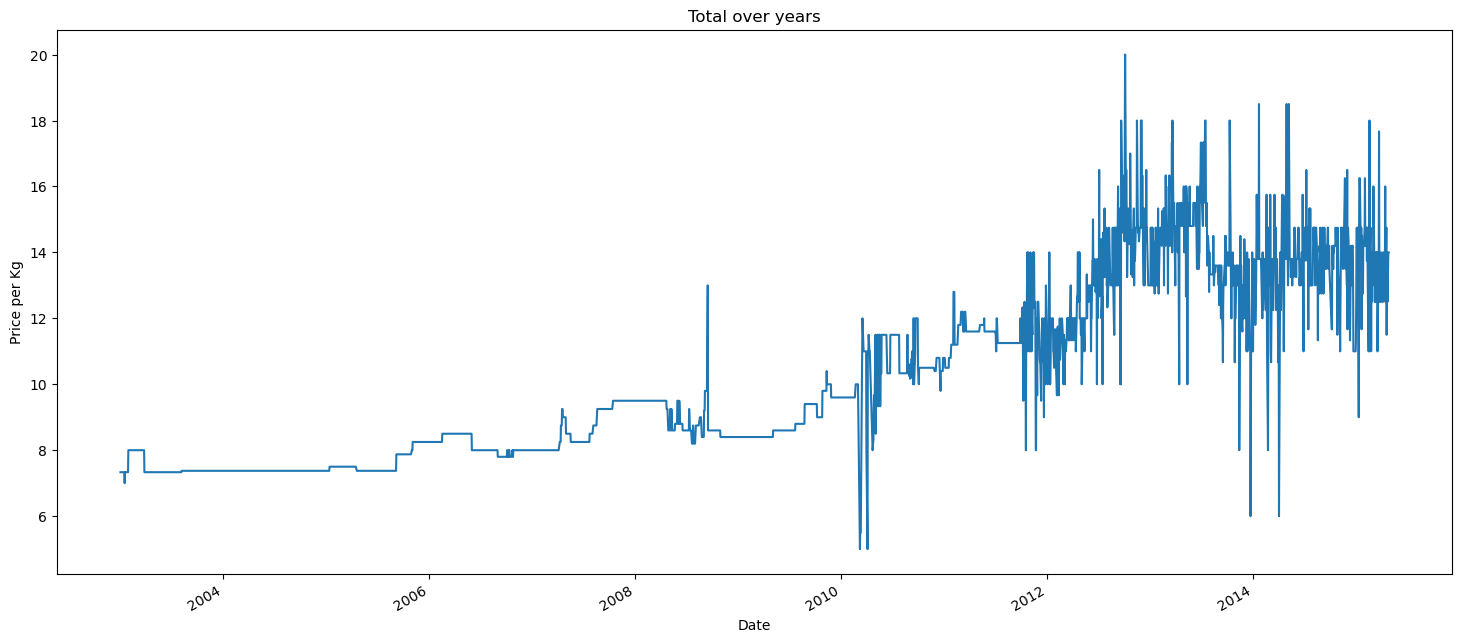

In [545]:
Region['Price per Kg'].plot()
plt.xlabel('Date')
plt.ylabel('Price per Kg')
plt.title('Total over years')
plt.show()

In [546]:
Region.tail(90)


,Price per Kg
Date,
2014-12-15,14.20
2014-12-16,14.00
2014-12-17,13.00
2014-12-18,14.00
2014-12-19,14.20
...,...
2015-04-22,13.25
2015-04-23,14.00
2015-04-24,12.50


In [547]:
#create new DataFrame
monthly_Region = pd.DataFrame()
print(monthly_Region)
# monthly_Region['Date'] = pd.to_datetime(monthly_Region['Date'], infer_datetime_format=True)

# # Specify a desired format for the dates
# # monthly_Region['Date'] = monthly_Region['Date'].dt.strftime("'%Y-%b-%d'")
# monthly_Region['Date']
monthly_Region['Price per Kg'] = Region['Price per Kg'].resample('MS').mean()

Empty DataFrame
Columns: []
Index: []


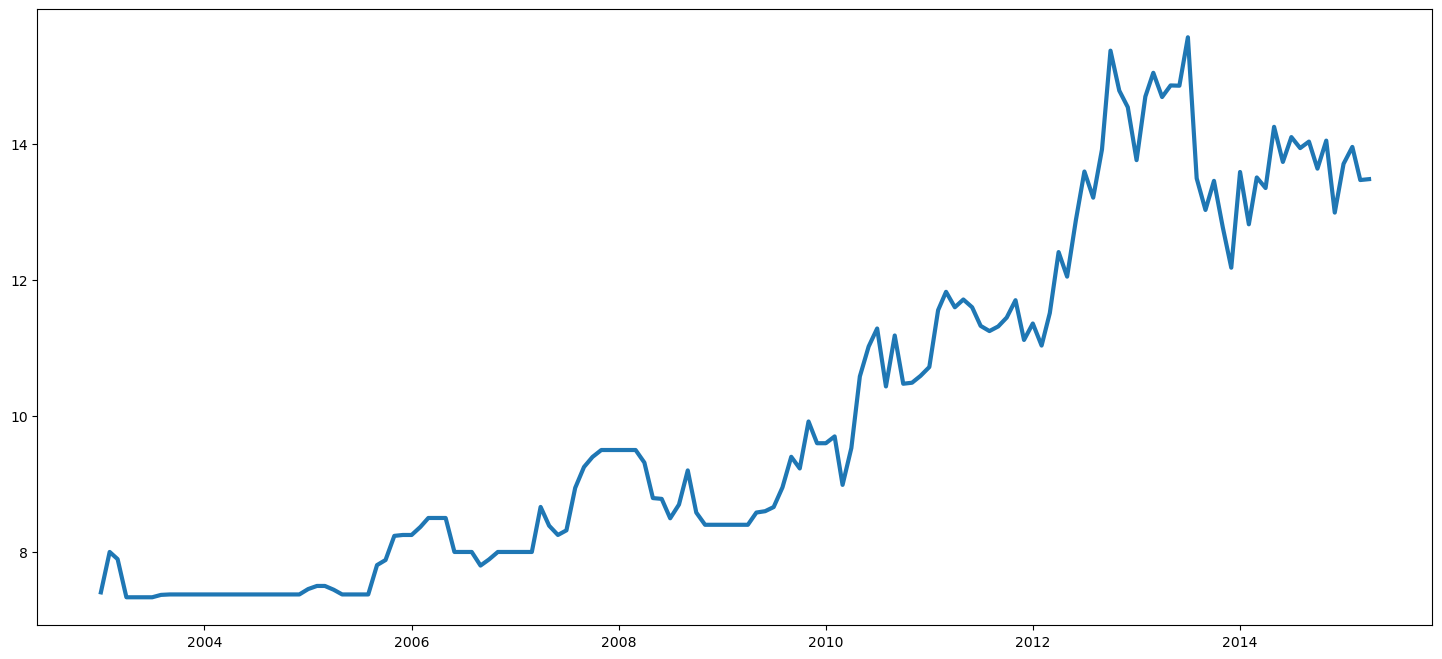

In [548]:
#plot weekly sales data
monthly_Region.values
plt.plot(monthly_Region.index,monthly_Region['Price per Kg'], linewidth=3)

In [549]:
Region['year'] = [d.year for d in Region.index]
Region['month'] = [d.strftime('%b') for d in Region.index]
years= Region['year'].unique()
years

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015])

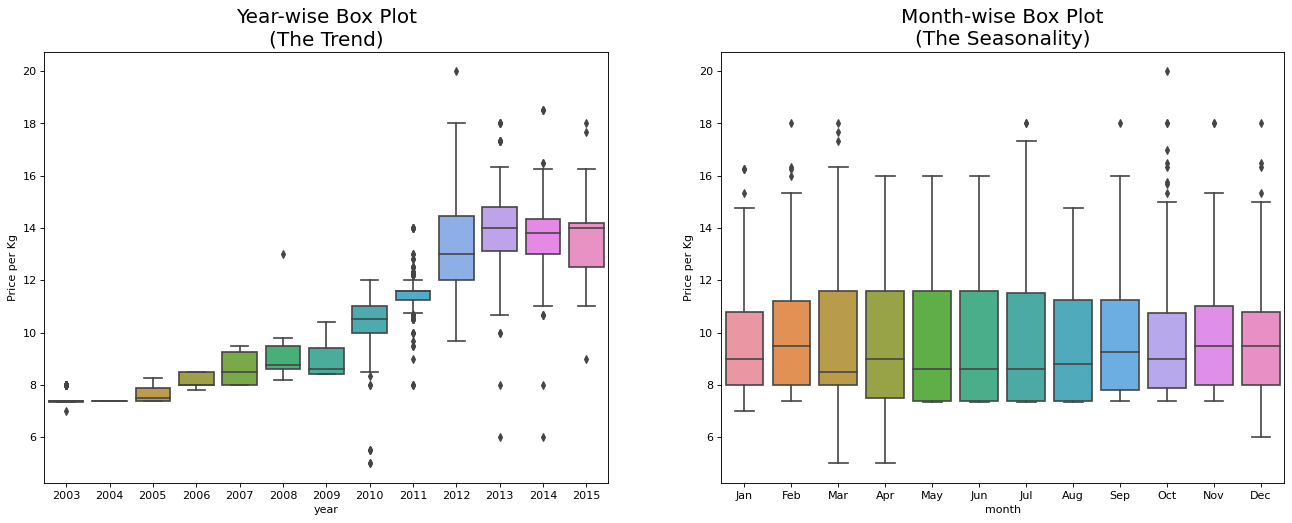

In [550]:
# Draw Plot

fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Price per Kg', data=Region, ax=axes[0])
sns.boxplot(x='month', y='Price per Kg', data=Region.loc[~Region.year.isin([2014,2917]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

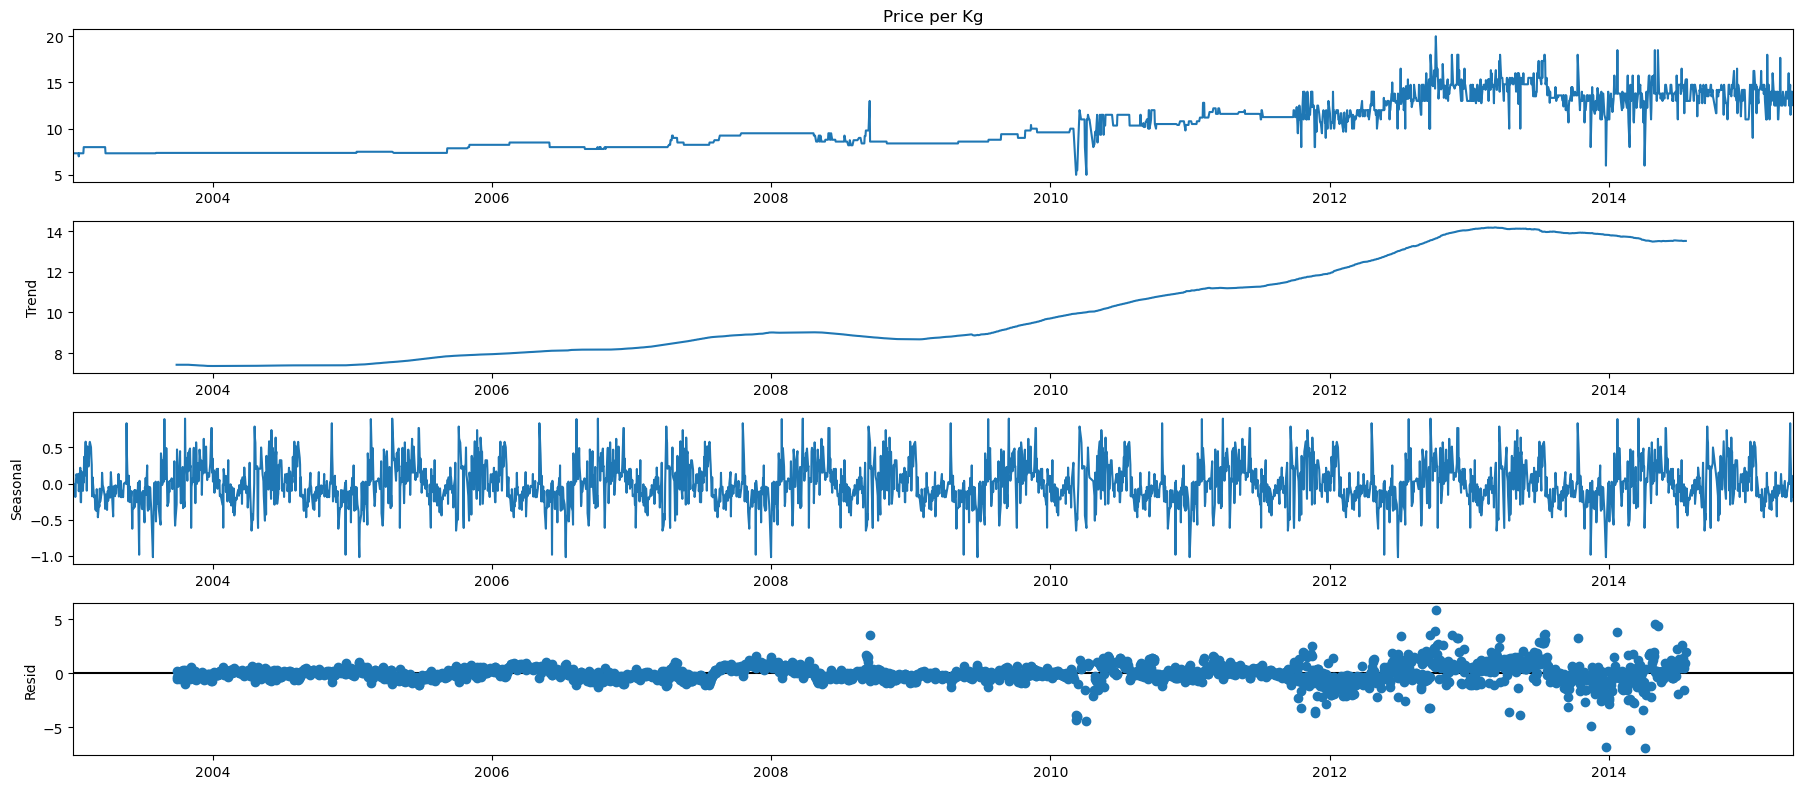

In [551]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(Region['Price per Kg'], model='additive', period=365)
fig = decomposition.plot()
plt.show()

Check Stationary of the Dataset 

In [552]:
#Determing rolling statistics
# moving_avg = monthly_Region.rolling(12).mean()
# moving_std= monthly_Region.rolling(12).std()


In [553]:
# Plot rolling statistics:
# orig = plt.plot(monthly_Region, color='blue',label='Original')
# mean = plt.plot(moving_avg, color='red', label='Rolling Mean')
# std = plt.plot(moving_std, color='black', label = 'Rolling Std')
# plt.legend(loc='best')
# plt.title('Rolling Mean & Standard Deviation')
# plt.show(block=False)

In [554]:
from statsmodels.tsa.stattools import adfuller
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(monthly_Region, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -0.537731
p-value                          0.884441
#Lags Used                       1.000000
Number of Observations Used    146.000000
Critical Value (1%)             -3.475953
Critical Value (5%)             -2.881548
Critical Value (10%)            -2.577439
dtype: float64


Dickey-Fuller Test

Null Hypothesis H0 : The time series is non-stationary (i.e., it has a unit root).
Alternative hypothesis H1: The time series is stationary. 

If the test statistic is less than the critical value, we reject the null hypothesis and conclude that the time series is stationary.

The test statistic (-0.809381) is greater than the critical values at all levels of significance (1%, 5%, and 10%). This means that we cannot reject the null hypothesis that the time series has a unit root, which indicates that the data is non-stationary.


To make time series stationary , we can try the following methods 
a. Differencing 
    i. Decompose 
    ii.ADF test 
b. Log transformations 
    i.Decompose
    ii. ADF test 

if time series is stationary based on above methods 

Forecasting 
a. Arima 
b. ETS 
c. ARCH 


In [555]:

### Testing For Stationarity
print(Region)
from statsmodels.tsa.stattools import adfuller
# test_result= adfuller(Region['Price per Kg'], autolag='AIC')
#Ho: It is non stationary#H1: It is stationary
def adfuller_test(sales):
    result=adfuller(sales) 
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):        
        print(label+' : '+str(value) )
    if result[1] <= 0.05:        
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:        
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

adfuller_test(Region['Price per Kg'])

            Price per Kg  year month
Date                                
2003-01-01      7.333333  2003   Jan
2003-01-02      7.333333  2003   Jan
2003-01-03      7.333333  2003   Jan
2003-01-06      7.333333  2003   Jan
2003-01-07      7.333333  2003   Jan
...                  ...   ...   ...
2015-04-22     13.250000  2015   Apr
2015-04-23     14.000000  2015   Apr
2015-04-24     12.500000  2015   Apr
2015-04-27     14.000000  2015   Apr
2015-04-28     14.000000  2015   Apr

[3018 rows x 3 columns]
ADF Test Statistic : -0.8093811129231558
p-value : 0.8163508930996011
#Lags Used : 27
Number of Observations Used : 2990
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [556]:
#create new DataFrame:
# y = Region
Region
# store = Region.set_index('Date')
# store.index

,Price per Kg,year,month
Date,,,
2003-01-01,7.333333,2003,Jan
2003-01-02,7.333333,2003,Jan
2003-01-03,7.333333,2003,Jan
2003-01-06,7.333333,2003,Jan
2003-01-07,7.333333,2003,Jan
...,...,...,...
2015-04-22,13.250000,2015,Apr
2015-04-23,14.000000,2015,Apr
2015-04-24,12.500000,2015,Apr


In [557]:
## Lets take a log transform here for simplicity:
miss = data_frame.isnull().sum()
print(miss)
store1= data_frame
cols1= ['Centre', 'Commodity', 'Region']
store1.drop(cols1, axis=1, inplace=True)
store1
# plt.plot(ts_log)

Date            0
Centre          0
Commodity       0
Price per Kg    0
Region          0
dtype: int64


,Date,Price per Kg
0,2003-01-01,6.5
1,2003-01-01,7.5
2,2003-01-01,7.0
3,2003-01-01,6.0
4,2003-01-01,6.0
...,...,...
93446,2015-04-28,14.0
93447,2015-04-28,14.0
93448,2015-04-28,17.0
93449,2015-04-28,16.0


In [558]:
store1 = store1.groupby('Date')['Price per Kg'].mean().reset_index()
store1

,Date,Price per Kg
0,2003-01-01,6.558824
1,2003-01-02,6.558824
2,2003-01-03,6.558824
3,2003-01-06,6.558824
4,2003-01-07,6.558824
...,...,...
3033,2015-04-22,14.909091
3034,2015-04-23,14.741935
3035,2015-04-24,14.966667
3036,2015-04-27,15.126984


In [559]:
store1 = store1.set_index('Date')
store1.index

DatetimeIndex(['2003-01-01', '2003-01-02', '2003-01-03', '2003-01-06',
               '2003-01-07', '2003-01-08', '2003-01-09', '2003-01-10',
               '2003-01-13', '2003-01-14',
               ...
               '2015-04-15', '2015-04-16', '2015-04-17', '2015-04-20',
               '2015-04-21', '2015-04-22', '2015-04-23', '2015-04-24',
               '2015-04-27', '2015-04-28'],
              dtype='datetime64[ns]', name='Date', length=3038, freq=None)

In [560]:
#create new DataFrame:
store1.index = pd.to_datetime(store1.index)

y = store1['Price per Kg'].resample('MS').mean()

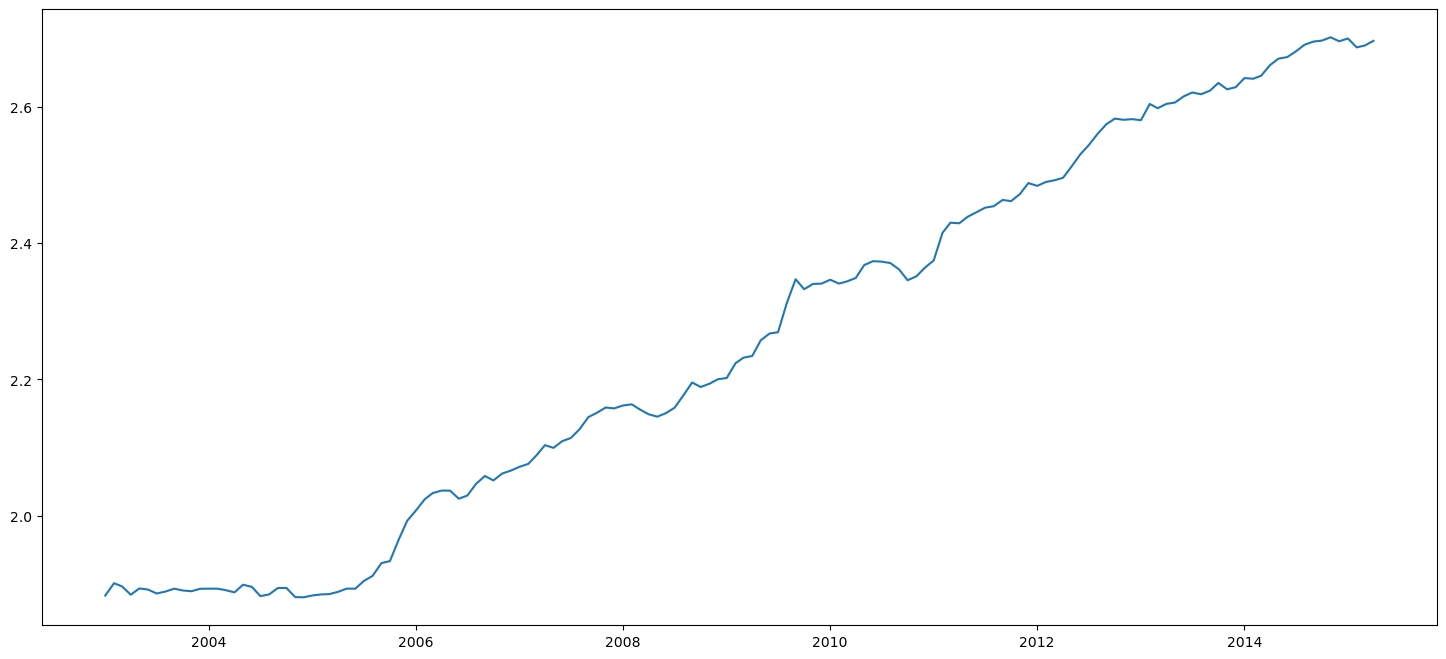

In [561]:
## Lets take a log transform here for simplicity:
ts_log = np.log(y)
plt.plot(ts_log)

Moving Average

In [562]:
# moving_avg = ts_log.rolling(12).mean()
# plt.plot(ts_log)
# plt.plot(moving_avg, color='red')

The red line shows the rolling mean.

Lets subtract this from the original series.

Note that since we are taking average of last 12 values, rolling mean is not defined for first 11 values. This can be observed as:

In [563]:
# ts_log_moving_avg_diff = ts_log - moving_avg
# ts_log_moving_avg_diff.head(12)

In [564]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print ('Results of Dickey-Fuller Test:')
    
    #Perform Dickey-Fuller test:
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [565]:
# ts_log_moving_avg_diff.dropna(inplace=True)
# test_stationarity(ts_log_moving_avg_diff)

Exponentially weighted moving average

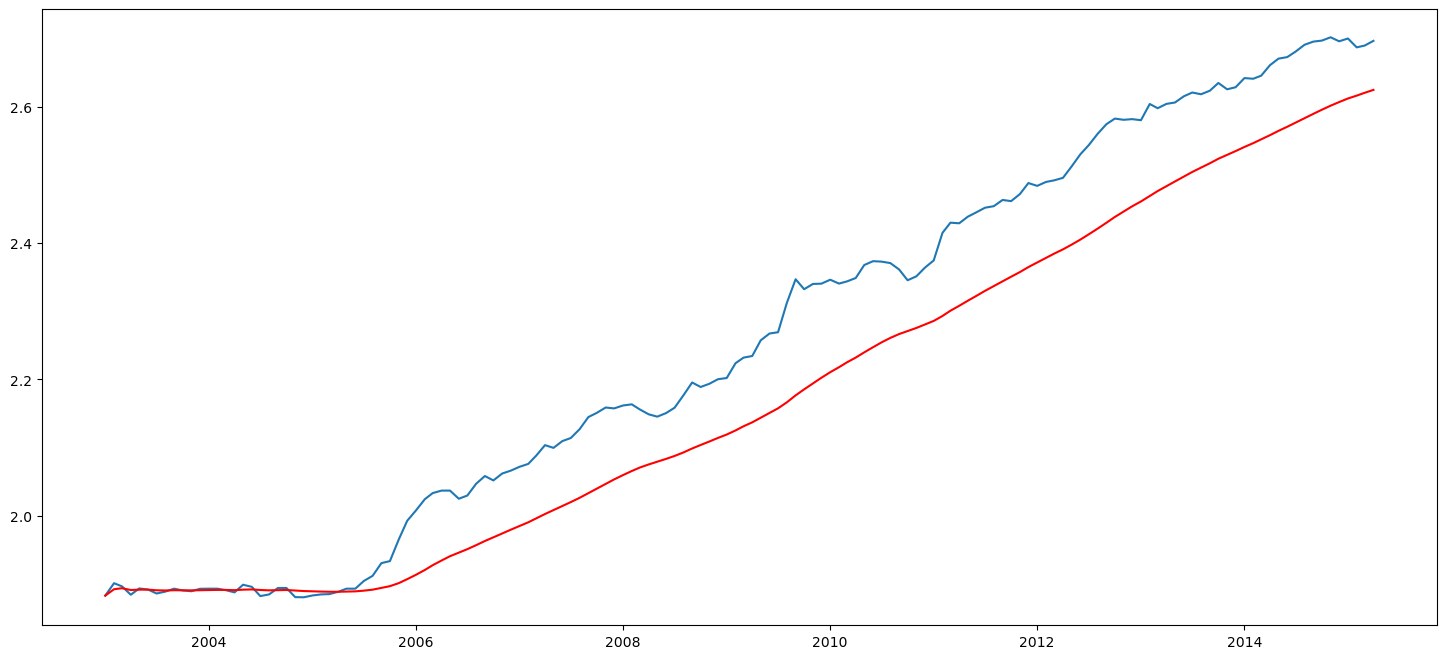

In [566]:
expwighted_avg = ts_log.ewm(halflife=12).mean()

plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

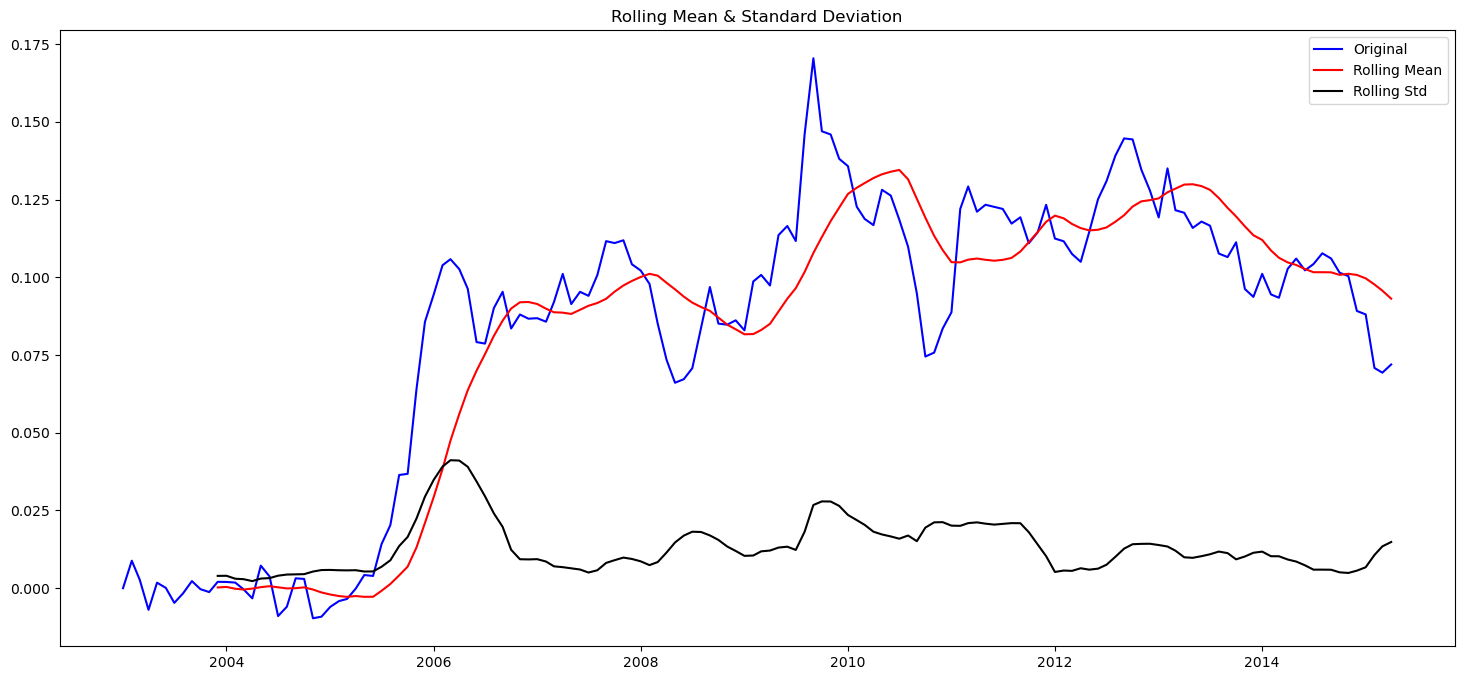

Results of Dickey-Fuller Test:
Test Statistic                  -1.836430
p-value                          0.362531
#Lags Used                       1.000000
Number of Observations Used    146.000000
Critical Value (1%)             -3.475953
Critical Value (5%)             -2.881548
Critical Value (10%)            -2.577439
dtype: float64


In [567]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

Differencing

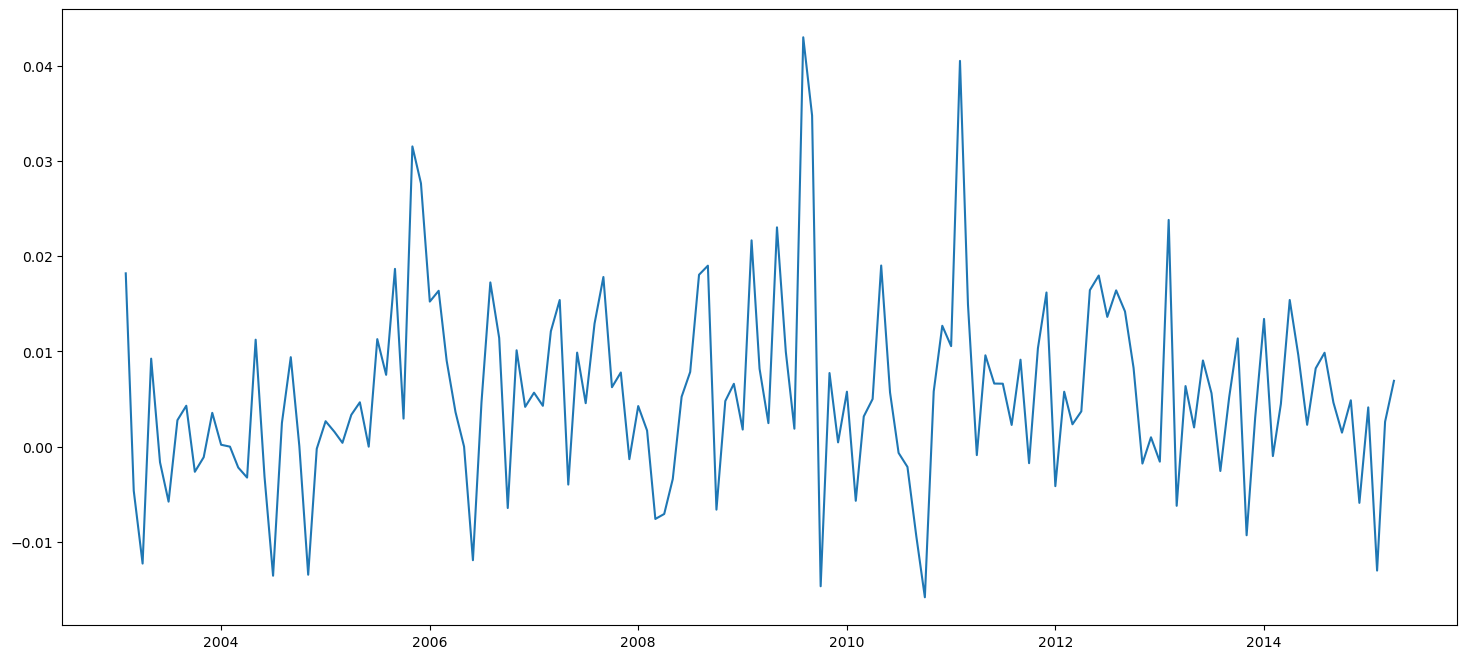

In [568]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

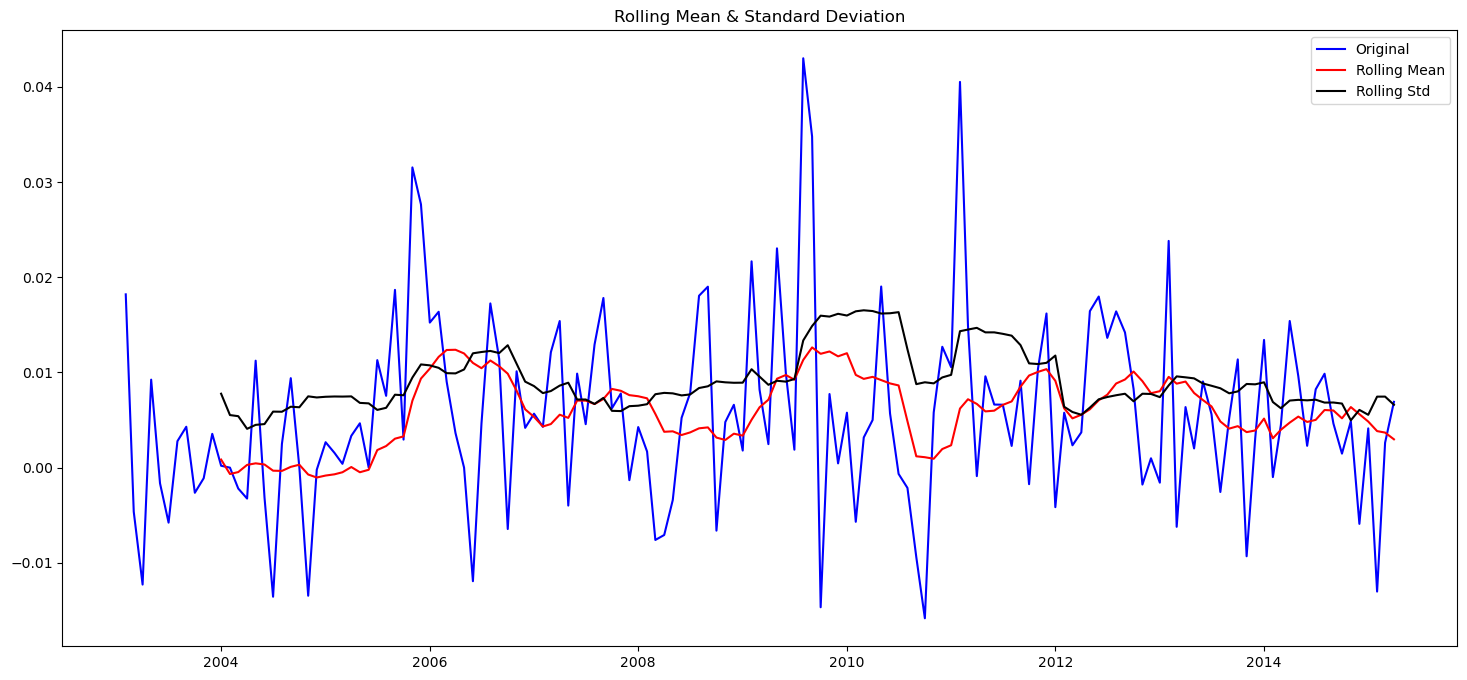

Results of Dickey-Fuller Test:
Test Statistic                -9.632117e+00
p-value                        1.601887e-16
#Lags Used                     0.000000e+00
Number of Observations Used    1.460000e+02
Critical Value (1%)           -3.475953e+00
Critical Value (5%)           -2.881548e+00
Critical Value (10%)          -2.577439e+00
dtype: float64


In [569]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

Decomposing

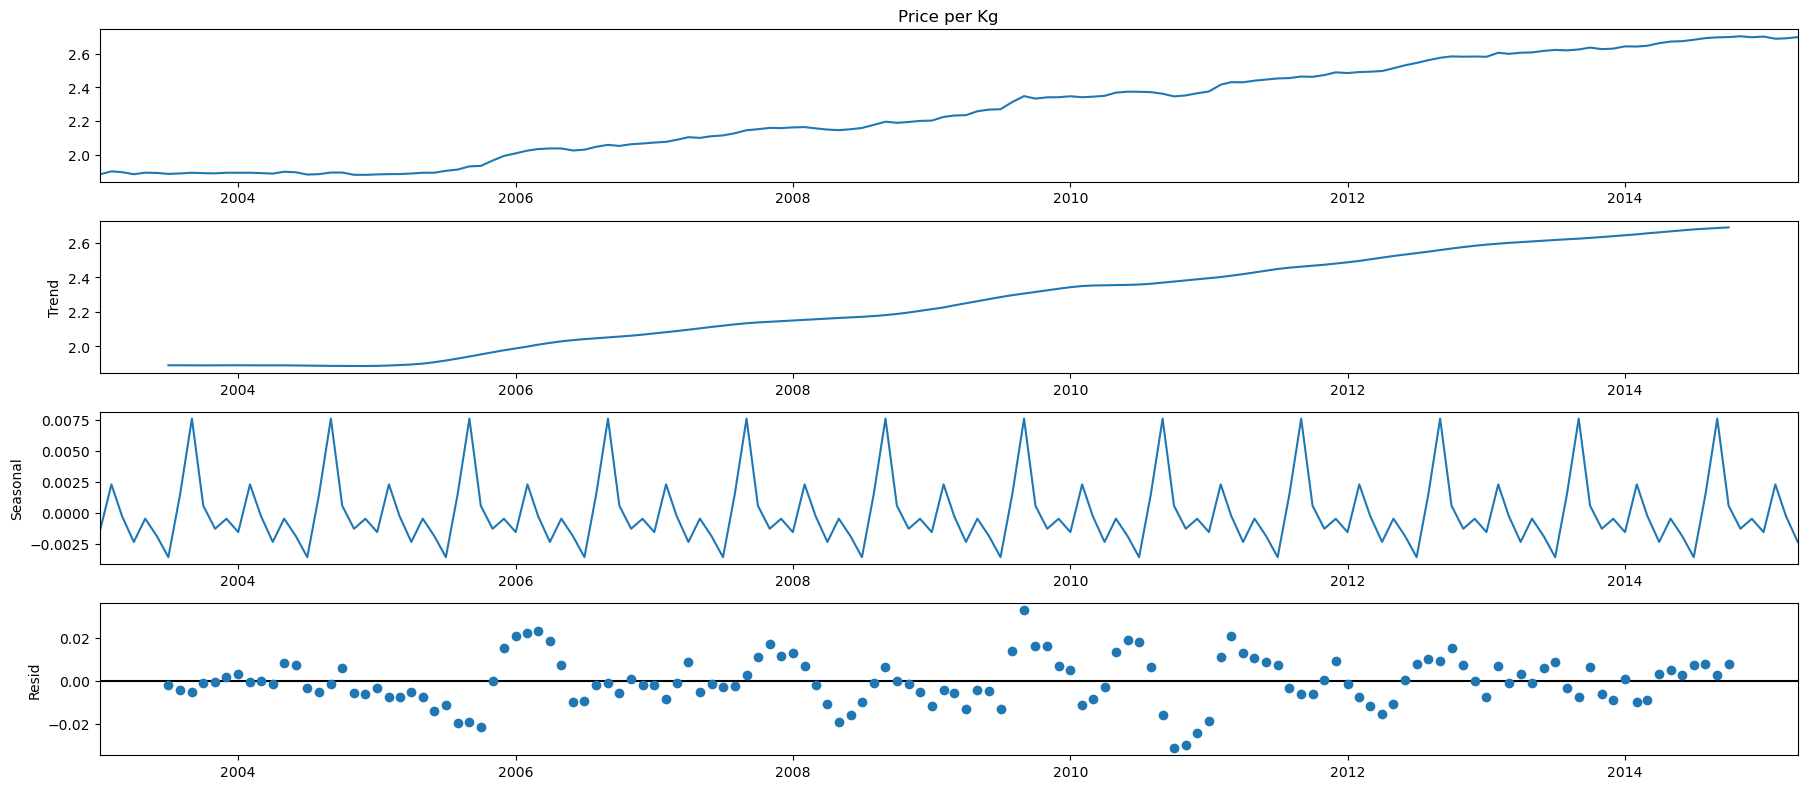

In [570]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(ts_log, model='additive')
fig = decomposition.plot()
plt.show()

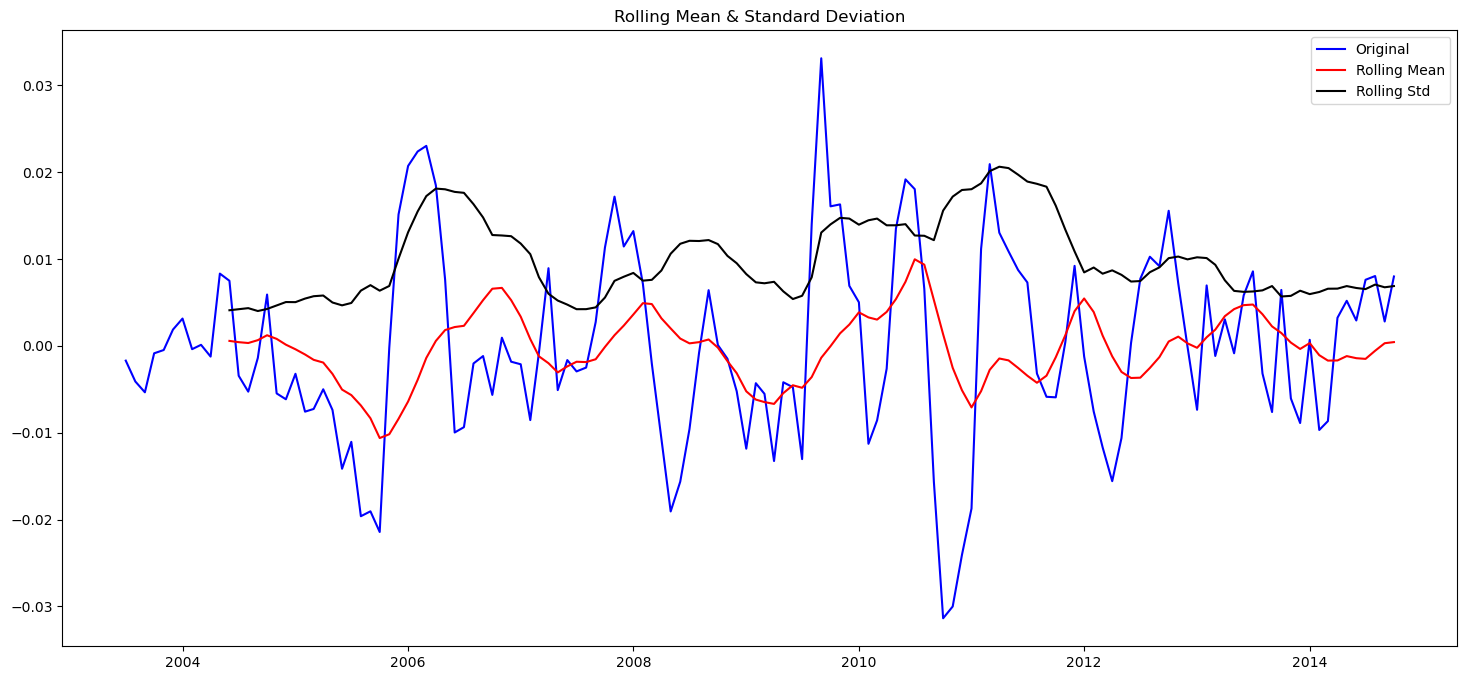

Results of Dickey-Fuller Test:
Test Statistic                -7.321401e+00
p-value                        1.191542e-10
#Lags Used                     3.000000e+00
Number of Observations Used    1.320000e+02
Critical Value (1%)           -3.480888e+00
Critical Value (5%)           -2.883697e+00
Critical Value (10%)          -2.578586e+00
dtype: float64


In [571]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)
residual = decomposition.resid

ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

The Dickey-Fuller test statistic is significantly lower than the 1% critical value.

So this TS is very close to stationary.


Time Series Forecasting with ARIMA 